# Прогноз оттока клиентов от Телеком-оператора

## Churn in Telecom's dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

**Загружаем данные из csv-файла, взятого с** https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

In [2]:
data = pd.read_csv('churn_telecom.csv', sep = ',', engine = 'python')

Data set представляет собой набор данных по оттоку клиентов американского телеком-оператора.

## Описание признаков
**1) State**: Буквенный код штата - `категориальный признак`

**2) Account length**: Как долго клиент обслуживается компанией - `количественный признак`

**3) Area code**: Префикс номера телефона - `количественный признак`

**4) Phone number**: Телефонный номер - `категориальный признак`

**5) International plan**: Международный роуминг (подключен/не подключен) - `бинарный признак`

**6) Voice mail plan**: Голосовая почта (подключена/не подключена) - `бинарный признак`

**7) Number vmail messages**: Количество голосовых сообщений - `количественный признак`

**8) Total day minutes**: Общая длительность разговоров днем - `количественный признак`

**9) Total day calls**: Общее количество звонков днем - `количественный признак`

**10) Total day charge**: Общая сумма оплаты за услуги днем - `количественный признак`

**11) Total eve minutes**: Общая длительность разговоров вечером - `количественный признак`

**12) Total eve calls**: Общее количество звонков вечером - `количественный признак`

**13) Total eve charge**: Общая сумма оплаты за услуги вечером - `количественный признак`

**14) Total night minutes**: Общая длительность разговоров ночью - `количественный признак`

**15) Total night calls**: Общее количество звонков ночью - `количественный признак`

**16) Total night charge**: Общая сумма оплаты за услуги ночью - `количественный признак`

**17) Total intl minutes**: Общая длительность международных разговоров - `количественный признак`

**18) Total intl calls**: Общее количество международных разговоров - `количественный признак`

**19) Total intl charge**: Общая сумма оплаты за международные разговоры - `количественный признак`

**20) Customer service calls**: Число обращений в сервисный центр - `количественный признак`

**21) Churn**: Признак оттока (1 – потеря клиента, то есть отток) - `бинарный признак`

**Churn** - _целевой признак_, его мы будем предсказывать по остальным признакам

Посмотрим на размер данных:

In [3]:
print(data.shape)

(3333, 21)


Отобразим первые 5 строк:

In [4]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Отобразим последние 5 строк:

In [5]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Каждая строка представляет собой информацию об одном клиенте - это **объект** исследования. Столбцы - **признаки** объекта. Посмотрим общую информацию о датасете и всех признаках:

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Векторизуем churn, international plan и voice mail plan:

In [7]:
data['churn'] = data['churn'].astype('int64')

Посмотрим статистические характеристики по числовым признакам

In [8]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
data.describe(include = ['object', 'bool'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,379-3132,no,no
freq,106,1,3010,2411


Посмотрим распределение оттока клиентов churn:

In [10]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

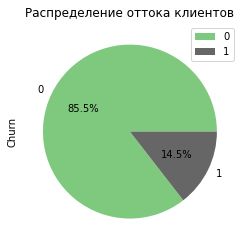

In [11]:
data['churn'].value_counts().plot(kind = 'pie', label = 'Churn', autopct='%1.1f%%', colormap ='Accent')
plt.legend()
plt.title('Распределение оттока клиентов');

Доля лояльных клиентов - 85.5%. Самая наивная модель "клиент всегда лоялен" будет угадывать с ошибкой 14.5%. Это будет нашей опорной точкой.

Посмотрим на распределение количественных признаков:

Матрица корреляции:

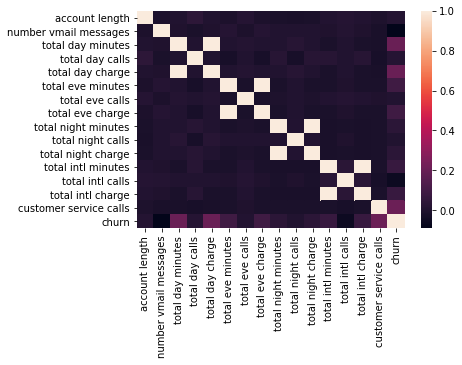

In [12]:
corr_matrix = data.drop(['state', 'international plan', 'voice mail plan', 'area code'], axis=1).corr()
sns.heatmap(corr_matrix);

Гистограммы:

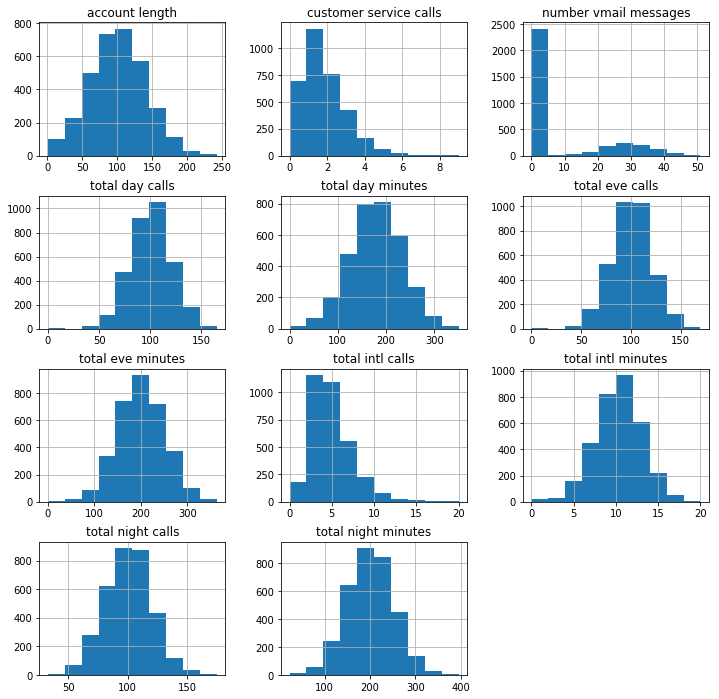

In [13]:
col = list(set(data.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                    'phone number', 'total day charge', 'total eve charge', 'total night charge', 
                                    'total intl charge', 'churn']))
data[col].hist(figsize=(12,12));

Большинство признаков распределено нормально. Исключение составляют Customer service calls - число обращений в сервисный центр (более подходит пуассоновское распределение), Number vmail messages - количество голосовых сообщений (пик в нуле объясняется тем, что у большинства голосовая почта не подключена, Total intl calls - количество международных сообщений (смещено).

Матрицы рассеяния:

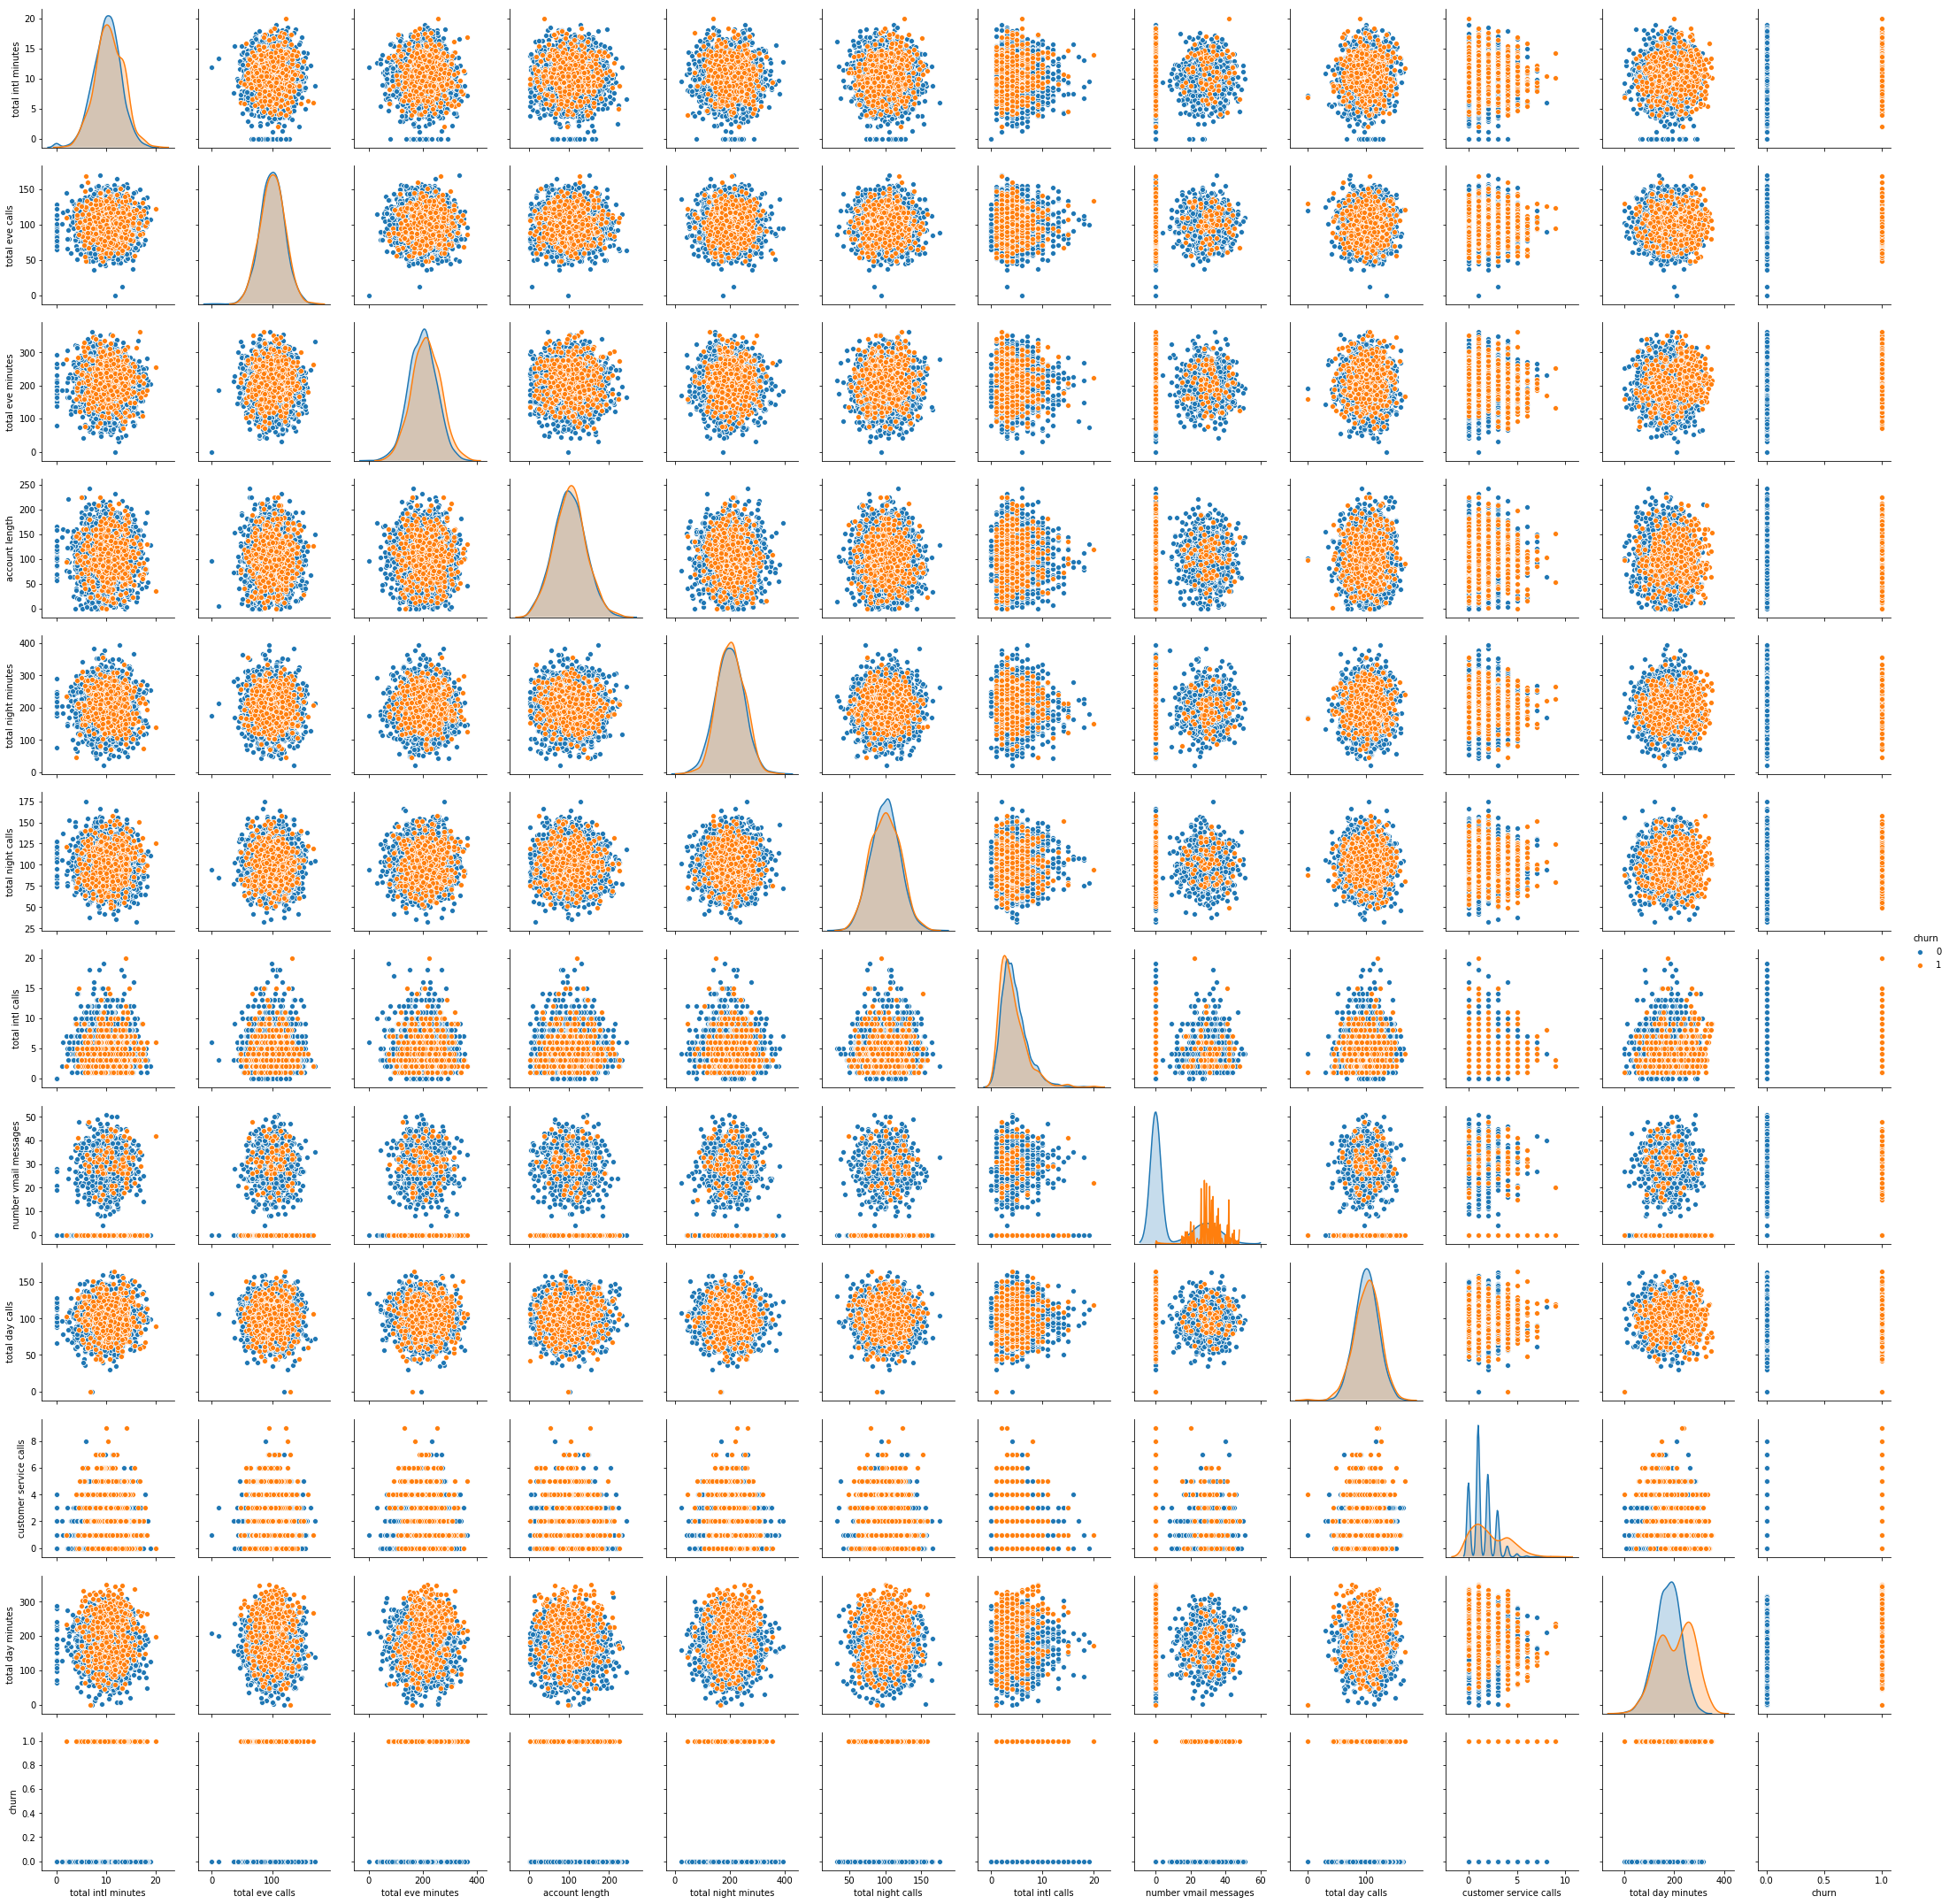

In [14]:
sns.pairplot(data[col + ['churn']], hue='churn');

Далее посмотрим как данные признаки связаны с целевым признаком churn – оттоком.
Построим boxplot-ы (ящики с усами), описывающее статистики распределения количественных признаков в двух группах: среди лояльных и ушедших клиентов.

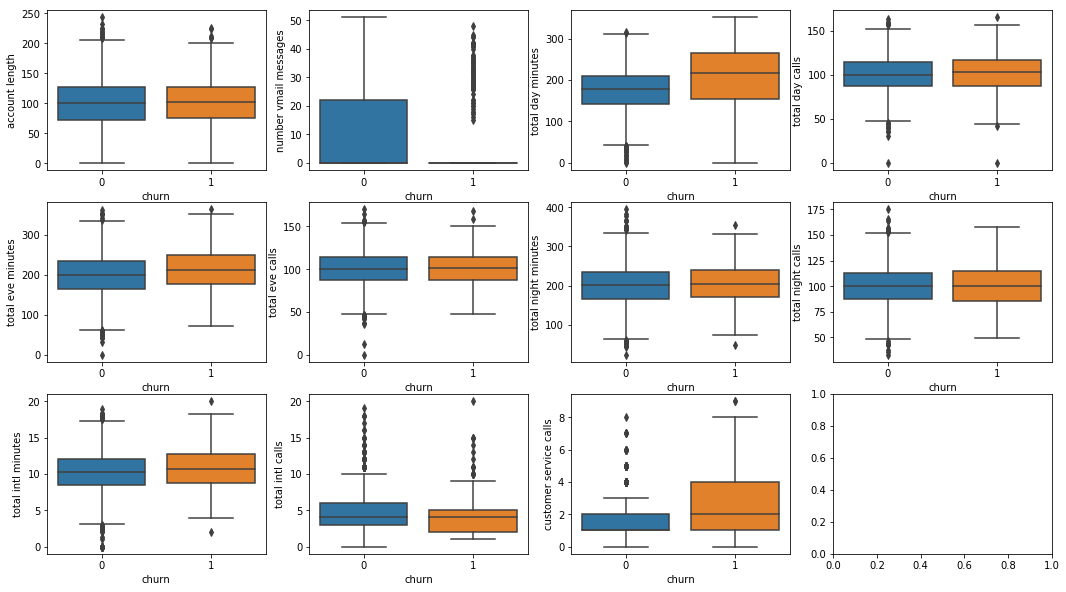

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))
sns.boxplot(x = data['churn'],y = data['account length'], ax = axes[0,0])
sns.boxplot(x = data['churn'],y = data['number vmail messages'], ax = axes[0,1])
sns.boxplot(x = data['churn'],y = data['total day minutes'], ax = axes[0,2])
sns.boxplot(x = data['churn'],y = data['total day calls'], ax = axes[0,3])
sns.boxplot(x = data['churn'],y = data['total eve minutes'], ax = axes[1,0])
sns.boxplot(x = data['churn'],y = data['total eve calls'], ax = axes[1,1])
sns.boxplot(x = data['churn'],y = data['total night minutes'], ax = axes[1,2])
sns.boxplot(x = data['churn'],y = data['total night calls'], ax = axes[1,3])
sns.boxplot(x = data['churn'],y = data['total intl minutes'], ax = axes[2,0])
sns.boxplot(x = data['churn'],y = data['total intl calls'], ax = axes[2,1])
sns.boxplot(x = data['churn'],y = data['customer service calls'], ax = axes[2,2]);

На графиках наибольшее отличие наблюдается для признаков Number vmail messages - количество голосовых сообщений (возможно в следствии того, что у большинства нет голосовой почты), Total day minutes - общая длительность разговоров днём (справа медиана и квантили выше, то есть ушедшие клиенты в среднем больше пользуются связью) и Customer service calls - число обращений в сервисный центр (похоже, что некоторые клиенты уходят от оператора после нескольких звонков в сервисный центр). 
Возможно, клиенты недовольны тарифами (стоимостью услуг) и качеством сервисного обслуживания.

In [16]:
pd.crosstab(data['churn'], data['international plan'], margins = True)

international plan,no,yes,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


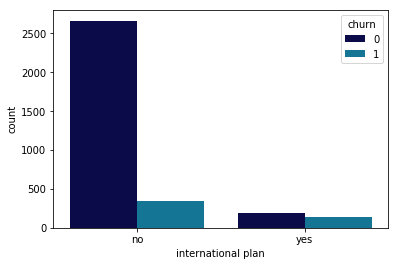

In [17]:
sns.countplot(x = 'international plan', hue = 'churn', data = data, palette = 'ocean');

In [18]:
pd.crosstab(data['churn'], data['voice mail plan'], margins = True)

voice mail plan,no,yes,All
churn,,,
0,2008,842,2850
1,403,80,483
All,2411,922,3333


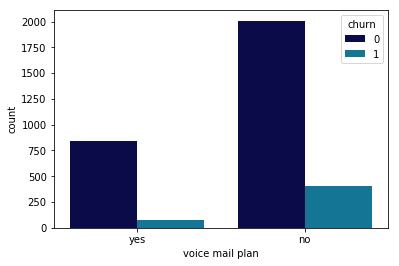

In [19]:
sns.countplot(x = 'voice mail plan', hue = 'churn', data = data, palette = 'ocean');

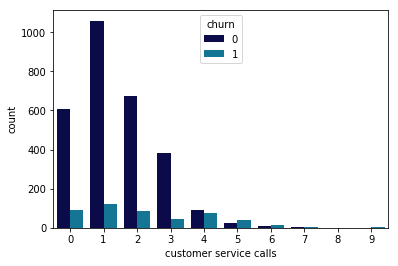

In [20]:
sns.countplot(x = 'customer service calls', hue = 'churn', data = data, palette = 'ocean');

In [21]:
data['many service calls'] = (data['customer service calls'] > 4).astype('int')
pd.crosstab(data['customer service calls'] > 4, data['churn'], margins=True)

churn,0,1,All
customer service calls,,,
False,2811,421,3232
True,39,62,101
All,2850,483,3333


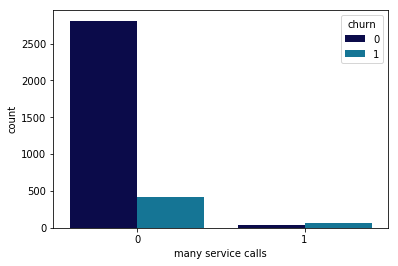

In [22]:
sns.countplot(x = 'many service calls', hue = 'churn', data = data, palette = 'ocean');

In [23]:
pd.crosstab(data['many service calls'] & data['international plan'] , data['churn'])

churn,0,1
row_0,,
False,2811,421
True,39,62


Видим, что если предположить отток клиента в случае, когда число звонков в сервисный центр больше 4 и подключен роуминг (и прогнозируя лояльность – в противном случае), то ошибаемся всего 421 + 39 раз, т.е. ошибка составляет 13.8%.

Таким образом, как вычислено ранее, наивная модель "клиент всегда лоялен" имеет ошибку 14.5%, а модель с гипотезой - 13.8%. От этого и будем отталкиваться.

## Готовим данные

In [24]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['state', 'phone number', 'international plan', 'voice mail plan']
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn', 'many service calls']


In [25]:
for c in categorical_columns:
    print(c, data[c].unique())

state ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
phone number ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
international plan ['no' 'yes']
voice mail plan ['yes' 'no']


## Векторизация

In [26]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['international plan', 'voice mail plan'] ['state', 'phone number']


In [27]:
data.drop('state', axis = 1)
data.drop('phone number', axis = 1);
data.drop('many service calls', axis = 1);

In [28]:
#data['international plan'] = pd.factorize(data['international plan'], sort = True)[0]
#data['voice mail plan'] = pd.factorize(data['voice mail plan'], sort = True)[0]

data.at[data['international plan'] == 'no', 'international plan'] = 0
data.at[data['international plan'] == 'yes', 'international plan'] = 1
data.at[data['voice mail plan'] == 'no', 'voice mail plan'] = 0
data.at[data['voice mail plan'] == 'yes', 'voice mail plan'] = 1
data['international plan'] = data['international plan'].astype('int64')
data['voice mail plan'] = data['voice mail plan'].astype('int64')

In [29]:
data['international plan'].describe()

count    3333.000000
mean        0.096910
std         0.295879
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: international plan, dtype: float64

In [30]:
data['voice mail plan'].describe()

count    3333.000000
mean        0.276628
std         0.447398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: voice mail plan, dtype: float64

In [31]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,many service calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


## X и y

In [32]:
X = data.drop(['churn','state','phone number','many service calls'], axis = 1) 
y = data['churn']
feature_names = X.columns

In [33]:
feature_names

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

In [34]:
print(X.shape)
print(y.shape)
N, d = X.shape

(3333, 18)
(3333,)


In [35]:
type(X)

pandas.core.frame.DataFrame

In [36]:
type(y)

pandas.core.series.Series

In [37]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,3.685421e-16,-1.258453e-16,-1.272276e-16,-5.426203e-16,-4.776657e-16,-3.462044e-15,-2.034576e-16,-2.195064e-15,4.640752e-16,3.262717e-16,2.605510e-15,-2.173912e-15,-3.597482e-17,-6.315647e-15,1.575764e-15,4.087972e-17,1.381966e-14,1.796076e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.512795e+00,-6.887309e-01,-3.275313e-01,-6.183035e-01,-5.916711e-01,-3.300601e+00,-5.004496e+00,-3.300667e+00,-3.963027e+00,-5.025157e+00,-3.963085e+00,-3.513121e+00,-3.429355e+00,-3.514838e+00,-3.666863e+00,-1.820015e+00,-3.667660e+00,-1.188040e+00
25%,-6.796428e-01,-6.887309e-01,-3.275313e-01,-6.183035e-01,-5.916711e-01,-6.623247e-01,-6.694697e-01,-6.622766e-01,-6.779283e-01,-6.582622e-01,-6.782106e-01,-6.697540e-01,-6.698335e-01,-6.675790e-01,-6.222756e-01,-6.011049e-01,-6.163417e-01,-4.278678e-01
50%,-1.627400e-03,-5.235247e-01,-3.275313e-01,-6.183035e-01,-5.916711e-01,-6.886644e-03,2.812069e-02,-6.729054e-03,8.274899e-03,-5.737769e-03,8.458004e-03,6.484830e-03,-5.504263e-03,4.690538e-03,2.246056e-02,-1.948014e-01,2.045516e-02,-4.278678e-01
75%,6.512763e-01,1.718559e+00,-3.275313e-01,1.616843e+00,8.694238e-01,6.724189e-01,6.758832e-01,6.725781e-01,6.767314e-01,6.969809e-01,6.765680e-01,6.807464e-01,6.588250e-01,6.813540e-01,6.671967e-01,6.178056e-01,6.705186e-01,3.323046e-01
max,3.564231e+00,1.718559e+00,3.052227e+00,1.616843e+00,3.134121e+00,3.139950e+00,3.217105e+00,3.140331e+00,3.208584e+00,3.507855e+00,3.207498e+00,3.838505e+00,3.827165e+00,3.836188e+00,3.496872e+00,6.306055e+00,3.496304e+00,5.653511e+00


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2333 1000


## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [40]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [41]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.11058722674667809 0.123


In [42]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[853   4]
 [119  24]]


### Подбор параметров

In [43]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.11058722674667809 3


In [44]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.06858122588941278 0.118


# Задание № 2

Обучаем классификатор

In [45]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (50,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=15, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [46]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [47]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.125


## Подбор гиперпараметров

In [48]:
alpha_arr = np.logspace(-4, -1, 10)
print(alpha_arr)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


Подберем оптимальное значение параметра регуляризации `alpha`

In [49]:
%%time
alpha_arr = np.logspace(-5, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 15)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Wall time: 3.76 s


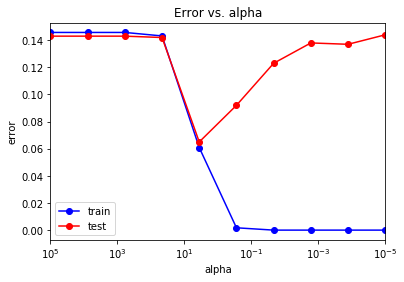

In [50]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [51]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.065


In [52]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[3.59381366]


In [53]:
alpha_opt = alpha_opt[0]

## Классификатор при найденном _оптимальном_ значении `alpha`:

Повторим обучение

In [54]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.06086583797685383
0.065


In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[849  57]
 [  8  86]]


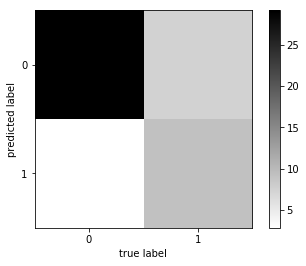

In [56]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Попробуем другие параметры

In [57]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (50,50), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=15, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.091


In [59]:
alpha_arr = np.logspace(-5, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 15)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

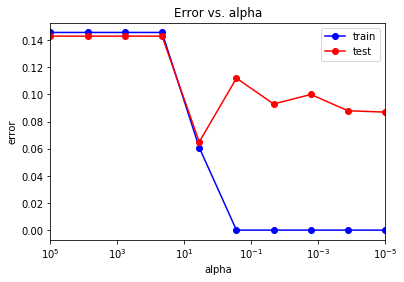

In [60]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [61]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.065


In [62]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]

[3.59381366]


In [63]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.06086583797685383
0.065


In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[844  52]
 [ 13  91]]


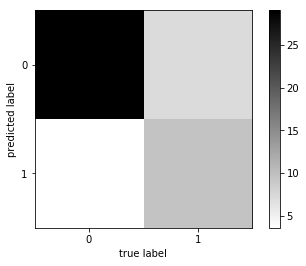

In [65]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

# Задание №3

## Random Forest

In [66]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.05


In [67]:
tree_arr = np.linspace(1, 60, 20, dtype=int)
print(tree_arr)
test_err = []
train_err = []
#oob_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    #oob_err.append(1 - rf.oob_score_)

[ 1  4  7 10 13 16 19 22 25 28 32 35 38 41 44 47 50 53 56 60]


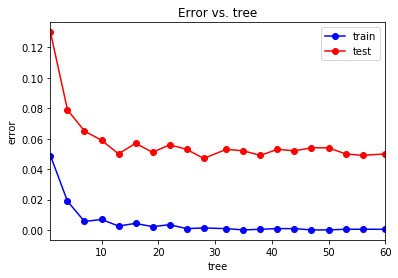

In [68]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
#plt.plot(tree_arr, oob_err, 'g-o', label = 'oob_err')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.legend()
pass

## Extremely Randomized Trees

In [69]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 30).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.075


In [70]:
tree_arr_ert = np.linspace(1, 60, 20, dtype=int)
print(tree_arr_ert)
test_err = []
train_err = []
for tree in tree_arr_ert:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  4  7 10 13 16 19 22 25 28 32 35 38 41 44 47 50 53 56 60]


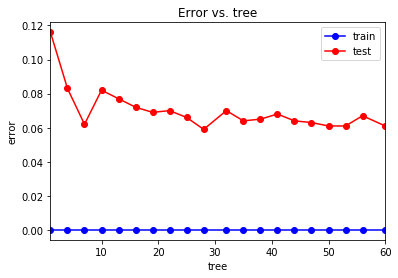

In [71]:
plt.plot(tree_arr_ert, train_err, 'b-o', label = 'train')
plt.plot(tree_arr_ert, test_err, 'r-o', label = 'test')
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.legend()
pass

## AdaBoost

In [72]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.09858551221603086 0.117


In [73]:
import sklearn.linear_model as lm
tree_arr_ada = np.linspace(1, 20, 20, dtype='int')
print(tree_arr_ada)
test_err = []
train_err = []
log_reg = lm.LogisticRegression(solver='lbfgs')

for tree in tree_arr_ada:
    ada = ensemble.AdaBoostClassifier(n_estimators = tree, learning_rate=0.3)
    ada.fit(X_train, y_train)

    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


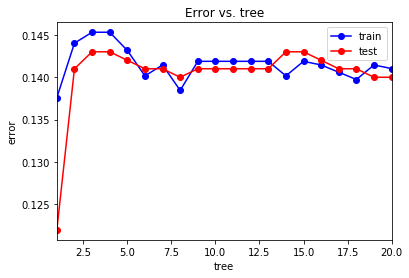

In [74]:
plt.plot(tree_arr_ada, train_err, 'b-o', label = 'train')
plt.plot(tree_arr_ada, test_err, 'r-o', label = 'test')
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.xlim([np.min(tree_arr_ada), np.max(tree_arr_ada)])
plt.legend()
pass

## GBT

In [75]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.02828975567938277 0.05


In [76]:
tree_arr_gbt = np.linspace(1, 20, 20, dtype='int')
print(tree_arr_gbt)
test_err = []
train_err = []
for tree in tree_arr_gbt:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


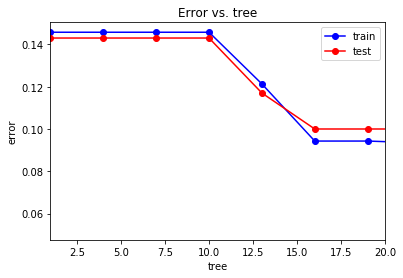

In [77]:
plt.plot(tree_arr_ert, train_err, 'b-o', label = 'train')
plt.plot(tree_arr_ert, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr_gbt), np.max(tree_arr_gbt)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

# Задание №4

In [78]:
X.shape

(3333, 18)

In [79]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 10)
X_train_cut = pca.fit_transform(X_train)
X_test_cut = pca.transform(X_test)

In [80]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 60)
rf.fit(X_train_cut, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
err_train = np.mean(y_train != rf.predict(X_train_cut))
err_test  = np.mean(y_test  != rf.predict(X_test_cut))


print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0
Error test: 0.093


In [82]:
from sklearn.decomposition import PCA
component_array = np.arange(1, 16, dtype=int)
test_err = []
train_err = []
oob_err = []
for components in component_array:
    pca = PCA(n_components = components)
    X_PCA_train = pca.fit_transform(X_train)
    X_PCA_test = pca.transform(X_test)
    rf = ensemble.RandomForestClassifier(n_estimators = 30, oob_score=True, bootstrap=True)
    rf.fit(X_PCA_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_PCA_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_PCA_test)))
    oob_err.append(1 - rf.oob_score_)

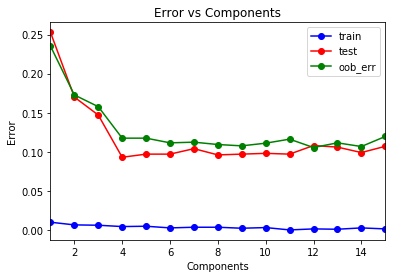

In [83]:
plt.plot(component_array, train_err, 'b-o', label = 'train')
plt.plot(component_array, test_err, 'r-o', label = 'test')
plt.plot(component_array, oob_err, 'g-o', label = 'oob_err')
plt.xlim([np.min(component_array), np.max(component_array)])
plt.title('Error vs Components')
plt.xlabel('Components')
plt.ylabel('Error')
plt.legend()
pass

In [84]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print ('Min error train:', min_train_err)
print ('Min error test:', min_test_err)

Min error train: 0.0
Min error test: 0.093


In [85]:
component_opt = component_array[test_err == min_test_err]
component_opt = component_opt[0]
print(component_opt)

4
